In [18]:
using DataFrames, PyPlot, ScikitLearn, LowRankModels
include("proxgrad.jl")

proxgrad (generic function with 1 method)

In [2]:
data = readtable("HCMST_train_clean.csv")

,CASEID_NEW,WEIGHT1,WEIGHT2,PPAGECAT,PPEDUCAT,PPGENDER,PPHHHEAD,PPHOUSEHOLDSIZE,PPINCIMP,Married,Widowed,Divorced,Separated,Never_Married,Living_With_Partner,PPMSACAT,Northeast,Midwest,South,West,Child_under_5,Child_between_6_and_12,Child_between_13_17,Child_18_,CHILDREN_IN_HH,PPWORK,White,Black,Other,Hispanic,Republican,Democrat,Other_1,PAPEVANGELICAL,Baptist,Protestant,Catholic,Mormon,Jewish,Other_Christian,Other_non_christian,None,Gay_lesbian_bi,straight,Partner_white,Partner_black,Other_2,Same_race,pBaptist,pProtestant,pCatholic,pMormon,pJewish,pOther_Christian,pOther_non_christian,pNone,same_religion,pEducat,pRepub,pDem,pOther,Relatives_see_month,_marriages,Q19,Age_met,Age_relationship,I_earned_more,Earned_same,Partner_earned_more,Grew_up_in_same_town,Approve,Neutral,Disapprove,Unsure,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Met_on_internet,Met_offline,Q34,Q24_MET_ONLINE,Q24_R_COWORK,Q24_R_FRIEND,Q24_R_FAMILY,Q24_R_SIG_OTHER,Q24_R_NEIGHBOR,Q24_P_COWORK,Q24_P_FRIEND,Q24_P_FAMILY,Q24_P_SIG_OTHER,Q24_P_NEIGHBOR,Q24_SCHOOL,Q24_COLLEGE,Q24_MILITARY,Q24_CHURCH,Q24_VOL_ORG,Q24_CUSTOMER,Q24_BAR_RESTAURANT,Q24_PUBLIC,Q24_PRIVATE_PARTY,Q24_BLIND_DATE,Q24_VACATION,Q24_SINGLES_SERVICE_NON_INTERNET,Q24_FAM_SISTER_ACTIVE,Q24_FAM_BROTHER_ACTIVE,Q24_FAM_MOTHER_ACTIVE,Q24_FAM_FATHER_ACTIVE,Q24_FAM_FEMALE,Q24_FAM_MALE,DISTANCEMOVED_10MI,SAME_SEX_COUPLE,AGE_DIFFERENCE,RELATIONSHIP_QUALITY,BREAKUP,Breakup_binary
1,800531,264379,264379,4,1,2,1,5,8,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,7,0,1,0,0,1,0,0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,30,1.0,1,19.0,21.0,0,0,1,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,290.0,0,3.0,3,0,0
2,3229381,19043,19043,3,1,2,1,2,11,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,7,1,0,0,0,1,0,0,1.0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,3,1.0,1,16.0,16.0,0,0,1,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.0,0,0.0,5,2,1
3,1494381,79930,79930,3,3,1,1,5,15,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,2.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,3,0,1,0,5,1.0,1,23.0,23.0,1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1.0,5,0,0
4,4137681,59025,59025,6,1,2,1,2,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,1,0,2.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,2.0,1,58.0,58.0,0,0,1,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1050.0,0,9.0,5,0,0
5,3747351,63277,63277,3,4,1,1,5,12,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2,1,0,0,0,0,1,0,0,1.0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,4,1,0,0,0,1.0,1,20.0,20.0,1,0,0,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,960.0,0,1.0,5,0,0
6,2945701,49737,49737,6,2,1,1,2,12,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,5,0,0,0,0,0,1,0,2.0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,2,1,0,0,0,1.0,1,47.0,48.0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170.0,0,27.0,5,0,0
7,1787296,46097,46097,2,4,2,1,2,13,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0.0,1,18.0,25.0,0,1,0,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,40.0,0,0.0,5,0,0
8,3800361,5781,5781,3,3,2,0,7,13,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1.0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,1,6,2.0,1,33.0,33.0,1,0,0,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,11.0,5,1,1
9,1560702,104032,104032,6,3,1,1,1,12,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,6,0,0,1,0,1,0,0,2.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,7,1.0,1,19.0,21.0,1,0,0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,40.0,0,1.0,5,0,0
10,1537541,32594,32594,4,3,1,1,2,19,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,2.0,0,0,0,0,0,0,0

In [3]:
@show size(ytrain)
@show size(Xtrain)

LoadError: LoadError: UndefVarError: ytrain not defined
while loading In[3], in expression starting on line 218

# a) Fit an ordinary least squares regression to the data. Interpret the coefficients that you find

In [6]:
Xtrain = [convert(Array{Float64}, data[2:end,4:118]) ones(2032)]
ytrain = Array(data[2:end,120])
w = Xtrain\ytrain;

In [8]:
w2 = [w linspace(1, 116, 116)]

116×2 Array{Float64,2}:
 -0.0424349      1.0
 -0.0135065      2.0
  0.00929877     3.0
 -0.000786761    4.0
  0.00187886     5.0
  0.00302637     6.0
 -0.0663284      7.0
 -0.071432       8.0
  0.155382       9.0
 -0.0686367     10.0
  0.0364407     11.0
 -0.0035926     12.0
  0.0229612     13.0
  ⋮                 
 -0.0326274    105.0
  0.0587561    106.0
  0.126659     107.0
  0.128551     108.0
 -0.0014485    109.0
 -0.0716872    110.0
 -0.052043     111.0
  4.0525e-6    112.0
  0.0184822    113.0
 -0.00176852   114.0
 -0.0984148    115.0
 -0.0181671    116.0

In [9]:
sortrows(w2,by=x->x[1])

116×2 Array{Float64,2}:
 -0.14984     50.0
 -0.114058    51.0
 -0.0984148  115.0
 -0.0870069   70.0
 -0.0862601   53.0
 -0.084761    41.0
 -0.0831892   46.0
 -0.0830626   48.0
 -0.081624    52.0
 -0.0784154   40.0
 -0.0716872  110.0
 -0.071432     8.0
 -0.0691253   47.0
  ⋮               
  0.155382     9.0
  0.158335    58.0
  0.163251    25.0
  0.173096    57.0
  0.182881    71.0
  0.196056    66.0
  0.196467    56.0
  0.214835    80.0
  0.218067    64.0
  0.230974    65.0
  0.244542    81.0
  0.292076    61.0

In [10]:
ch = ConvergenceHistory("Q1")

LowRankModels.ConvergenceHistory("Q1",Float64[],Float64[],Float64[],Float64[],Float64[],Float64[],0)

# b) Fit a quantile regression on the data with $q=0.05$ and $q=0.95$. Compare these coefficients to those you found in part a).

In [22]:
wprox = proxgrad(HingeLoss(), QuadReg(), Xtrain, ytrain, maxiters=1000, ch = ch)
w2prox = [w linspace(1, 116, 116)]

116×2 Array{Float64,2}:
 -0.0424349      1.0
 -0.0135065      2.0
  0.00929877     3.0
 -0.000786761    4.0
  0.00187886     5.0
  0.00302637     6.0
 -0.0663284      7.0
 -0.071432       8.0
  0.155382       9.0
 -0.0686367     10.0
  0.0364407     11.0
 -0.0035926     12.0
  0.0229612     13.0
  ⋮                 
 -0.0326274    105.0
  0.0587561    106.0
  0.126659     107.0
  0.128551     108.0
 -0.0014485    109.0
 -0.0716872    110.0
 -0.052043     111.0
  4.0525e-6    112.0
  0.0184822    113.0
 -0.00176852   114.0
 -0.0984148    115.0
 -0.0181671    116.0

In [24]:
sortrows(w2prox,by=x->x[1])

116×2 Array{Float64,2}:
 -0.14984     50.0
 -0.114058    51.0
 -0.0984148  115.0
 -0.0870069   70.0
 -0.0862601   53.0
 -0.084761    41.0
 -0.0831892   46.0
 -0.0830626   48.0
 -0.081624    52.0
 -0.0784154   40.0
 -0.0716872  110.0
 -0.071432     8.0
 -0.0691253   47.0
  ⋮               
  0.155382     9.0
  0.158335    58.0
  0.163251    25.0
  0.173096    57.0
  0.182881    71.0
  0.196056    66.0
  0.196467    56.0
  0.214835    80.0
  0.218067    64.0
  0.230974    65.0
  0.244542    81.0
  0.292076    61.0

# c) Fit quantile regressions for $q=0.05, 0.10, \cdots, 0.95$.

In [35]:
qvals = zeros(19)
q = .05
quantiles = zeros(19,4)
for i = 1:19
    qvals[i] = q
    quantiles[i,:] = proxgrad(1/9322*QuantileLoss(quantile=q), ZeroReg(), X, y, maxiters=1000)
    q = q +.05
end

[30.2242 37.272 25.8582 50.0; 60.4448 74.5404 51.7164 99.9964; 90.6307 111.774 77.5746 149.958; 120.779 148.984 103.392 199.862; 150.847 186.107 129.079 249.631; 180.914 223.228 154.78 299.41; 210.995 260.327 180.465 349.177; 241.081 297.429 206.159 398.944; 271.179 334.531 231.859 448.716; 301.27 371.616 257.538 498.479; 331.358 408.701 283.228 548.234; 361.43 445.759 308.914 597.965; 391.469 482.776 334.549 647.65; 421.459 519.76 360.152 697.289; 451.409 556.702 385.722 746.882; 481.26 593.527 411.206 796.353; 511.027 630.248 436.603 845.711; 540.598 666.759 461.819 894.842; 569.892 702.99 486.788 943.683]

# d) Create an intercept plot that plots quantiles against the intercept coefficient from that quantile regression. Create coefficient plots for MaritalStatus, Male, and PrenatalCare coefficients.


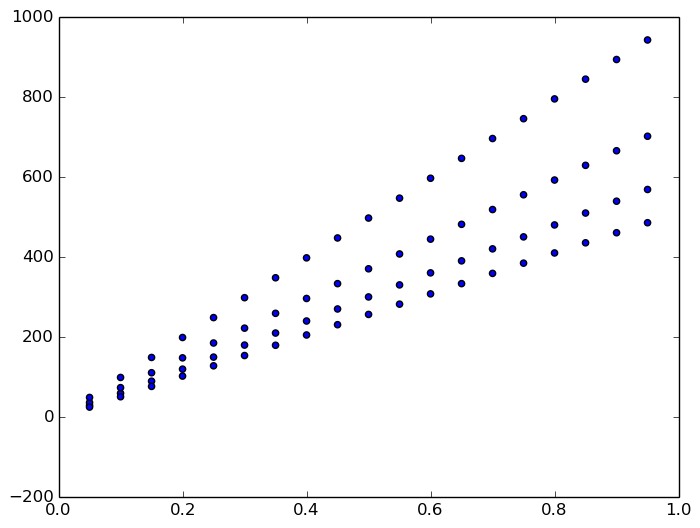

PyObject <matplotlib.collections.PathCollection object at 0x7f609dfcd6d0>

In [37]:
marq = quantiles[:,1]
preq = quantiles[:,2]
malq = quantiles[:,3]
intq = quantiles[:,4]
scatter(qvals,marq)
scatter(qvals,preq)
scatter(qvals,malq)
scatter(qvals,intq)

# e) How should you interpret the intercepts of the quantile regressions?

In [ ]:
The intercept for each of the quantiles represents the baseline when all the features are zero. For the quantile regression the
baseline for each quantile is the sum of the intercept terms prior to and including that quantile.    
The increase in the intercept term might represent other factors not in the model that effect birth weight. 
These other factors might include genetics, nutrition during pregnancy, income, education, duration of pregnancy, etc. 
Since the slope of the plot of the intercept term is greater than for any of the factors this would suggest the most important factors were rolled into the intercept.
The intercept term represents unmarried mothers, who did not receive prenatal care, and had a girl.

# f) What does the coefficient plot tell you about the effect of prenatal care for infants with low birth weight compared to those with average birth weights?

In [ ]:
The coefficient on prenatal care for the lowest quantile is 37.272, while the coefficient for the linear regression on prenatal care is 73.0585. 
The coefficient on prenatal care for the .5 quantile is 371.616. 
All the coefficients are positive which suggests that prenatal care is likely to produce heavier babies, but it will produce the largest weight gains for bigger babies which would seem obvious. 
It would be interesting to see if the same pattern holds for percentage weight gain. We could see this by comparing the coefficients on prenatal care to the intercept term. 
In the lowest quantile the percentage gain due to prenatal care is 37.272/50.0=.7454 and for the regression we have 73.0585/3138.93=.0232. 
Thus the percentage gain for the smallest babies might be much higher than for the average having stronger implications for the health of the baby.